In [7]:
import numpy as np; import scipy as sp; import pandas as pd; 
import statsmodels.api as sm 
import pylab as py ; import matplotlib.pyplot as plt; 

In [8]:
path = "D:\Downloads\WL"

In [9]:
df = pd.read_csv(path +"\\completed_deduped_HyeongcheolPark_20210212 gc feb 13.csv")

Breifly looking at the data

In [10]:
df.head()

,id,orderid,rider_username,driver_id,driver.rate,score_count,Order_complet_count,Order_rider_cancle_count,order_admin_cancle_count,car_desc,...,tsr_osrm,pickup_date.time,pickup_date.time_osrm,trip_update_date.time,total.trip.cycle,driver.wait.time,delay,delay.osrm,address_fromto,dedup_index
0,4,1347152,1.778241e+10,1184,5.0,1346,2057,175,16,Toyota Camry,...,-1.066667,2019/7/31 23:50,2019/7/31 23:52,2019/8/1 10:04,NaN,NaN,-4,-2,"CF Richmond Centre,Number 3 Road, Richmond, BC...","CF Richmond Centre,Number 3 Road, Richmond, BC..."
1,6,1347147,1.236889e+10,162,5.0,457,654,43,2,Tesla Model X,...,-0.250000,2019/7/31 23:48,2019/7/31 23:50,2019/8/1 23:43,NaN,NaN,-3,-1,"4771 Garden City Rd, Richmond, BC V6X 3M7, Can...","4771 Garden City Rd, Richmond, BC V6X 3M7, Can..."
2,10,1347138,1.778981e+10,95,5.0,3114,4504,812,65,Lexus RX,...,7.016667,2019/7/31 23:52,2019/7/31 23:51,2019/8/5 19:47,NaN,NaN,7,7,"2976 Cliffrose Crescent,Coquitlam, BC, Canada ...","2976 Cliffrose Crescent,Coquitlam, BC, Canada ..."
3,13,1347135,1.250687e+10,488,5.0,8665,11369,560,82,Toyota Prius,...,0.383333,2019/7/31 23:39,2019/7/31 23:43,2019/8/1 14:42,NaN,NaN,-4,0,"JiangHu ??-??????,Canada, British Columbia, Ri...","JiangHu ??-??????,Canada, British Columbia, Ri..."
4,14,1347132,1.778317e+10,1333,5.0,2038,3471,386,15,Mazda CX-9,...,-2.266667,2019/7/31 23:42,2019/7/31 23:39,2019/9/11 1:13,NaN,NaN,0,-3,"7371 Westminster Highway,Richmond, BC, Canada ...","7371 Westminster Highway,Richmond, BC, Canada ..."


In [11]:
df["driver_id"].nunique()

1090

We have a total of 1090 drivers in our dataset

In [12]:
df["orderid"].nunique()

579729

And 579729 trips

# Preliminary Data Excavation 

In [14]:
df.loc[df["Order_complet_count"] == 0]

,id,orderid,rider_username,driver_id,driver.rate,score_count,Order_complet_count,Order_rider_cancle_count,order_admin_cancle_count,car_desc,...,tsr_osrm,pickup_date.time,pickup_date.time_osrm,trip_update_date.time,total.trip.cycle,driver.wait.time,delay,delay.osrm,address_fromto,dedup_index
217991,245575,1099338,1.250208e+10,1852,0.0,0,0,0,0,Lexus RX,...,17.833333,2019/4/17 16:29,2019/4/17 16:30,2019/4/17 16:46,NaN,NaN,16,17,"5800 Minoru Blvd, Richmond, BC V6X 2B1, Canada...","5800 Minoru Blvd, Richmond, BC V6X 2B1, Canada..."
218656,246305,1098606,1.778887e+10,1852,0.0,0,0,0,0,Lexus RX,...,11.350000,2019/4/17 10:58,2019/4/17 11:01,2019/4/17 11:03,5H 22M 39S,5H 8M 48S,8,11,"6633 Pearson Way,Richmond, BC, Canada 7373 Wes...","6633 Pearson Way,Richmond, BC, Canada 7373 Wes..."
229338,258265,1086522,1.779000e+10,1852,0.0,0,0,0,0,Lexus RX,...,25.216667,2019/4/12 16:20,2019/4/12 16:23,2019/4/12 16:31,4d 18H 51M 31S,4d 18H 18M 42S,21,25,"5311 Cedarbridge Way,Richmond, BC, Canada 1145...","5311 Cedarbridge Way,Richmond, BC, Canada 1145..."
230234,259236,1085548,1.778241e+10,1852,0.0,0,0,0,0,Lexus RX,...,21.933333,2019/4/12 9:59,2019/4/12 10:02,2019/4/12 10:06,6H 17M 54S,5H 52M 4S,18,21,"6020 Dover Road,Richmond, BC, Canada Richmond-...","6020 Dover Road,Richmond, BC, Canada Richmond-..."
373289,422624,920474,1.250893e+10,1727,0.0,0,0,0,0,Land Rover Range Rover Sport,...,24.283330,2019/2/8 19:36,2019/2/8 19:40,2019/2/8 19:50,NaN,NaN,20,24,"Walmart Victoria Supercentre,Saanich Road, Vic...","Walmart Victoria Supercentre,Saanich Road, Vic..."
373365,422713,920385,1.250813e+10,1727,0.0,0,0,0,0,Land Rover Range Rover Sport,...,8.700000,2019/2/8 19:01,2019/2/8 19:01,2019/2/8 19:05,23M 3S,10M 15S,8,8,"3669 Shelbourne St, Victoria, BC V8P 4H1, Cana...","3669 Shelbourne St, Victoria, BC V8P 4H1, Cana..."
404443,458777,883951,1.604729e+10,1710,0.0,0,0,0,0,Lexus IS,...,6.566667,2019/1/25 22:55,2019/1/25 22:58,2019/1/25 23:17,NaN,NaN,3,6,"0755 Restaurant & Lounge,Sexsmith Road, Richmo...","0755 Restaurant & Lounge,Sexsmith Road, Richmo..."
405320,459805,882917,1.604722e+10,1710,0.0,0,0,0,0,Lexus IS,...,13.900000,2019/1/25 19:05,2019/1/25 19:07,2019/1/25 19:09,3H 58M 21S,3H 42M 51S,11,13,"8288 Lansdowne Road,Richmond, BC, Canada ?? sh...","8288 Lansdowne Road,Richmond, BC, Canada ?? sh..."
426992,484138,858383,8.610000e+12,1670,0.0,0,0,0,0,Subaru Impreza WRX,...,28.300000,2019/1/15 17:26,2019/1/15 17:26,2019/1/15 17:34,NaN,NaN,28,28,"6854 Carnegie Street,Burnaby, BC, Canada 9877 ...","6854 Carnegie Street,Burnaby, BC, Canada 9877 ..."
430536,488103,854375,1.778513e+10,1670,0.0,0,0,0,0,Subaru Impreza WRX,...,15.950000,2019/1/13 19:08,2019/1/13 19:10,2019/1/13 19:13,1d 22H 3M 43S,1d 21H 44M 28S,14,15,"2991 Lougheed Hwy #120, Coquitlam, BC V3B 6J6,...","2991 Lougheed Hwy #120, Coquitlam, BC V3B 6J6,..."


It seems that these drivers have completed trips however there are data issues with their driver profile

## Driver Experience

In [15]:
df_order_complete = df[["driver_id","Order_complet_count"]].groupby(["driver_id"]).mean()
df_order_complete.describe()

,Order_complet_count
count,1090.000000
mean,1043.508257
std,1697.370345
min,0.000000
25%,104.250000
50%,362.000000
75%,1253.500000
max,11599.000000


<AxesSubplot:>

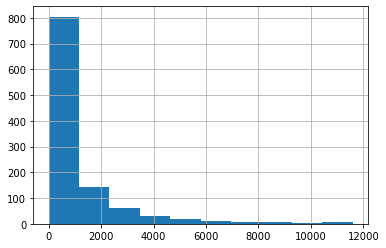

In [16]:
df_order_complete["Order_complet_count"].hist(bins = 10)

Most drivers have completed less than 400 trips during the period of analysis

## Driver Quality

In [17]:
df["rider_cancel_prop"] = df["Order_rider_cancle_count"]/(df["Order_complet_count"] + df["Order_rider_cancle_count"])
df["admin_cancel_prop"] = df["order_admin_cancle_count"]/(df["Order_complet_count"] + df["order_admin_cancle_count"])
df_order_rider_cancel = df[["driver_id","rider_cancel_prop"]].groupby(["driver_id"]).mean()
df_order_admin_cancel = df[["driver_id","admin_cancel_prop"]].groupby(["driver_id"]).mean()

In [18]:
df_order_rider_cancel.describe()

,rider_cancel_prop
count,1084.000000
mean,0.132543
std,0.081518
min,0.000000
25%,0.082743
50%,0.114892
75%,0.163345
max,0.764706


<AxesSubplot:>

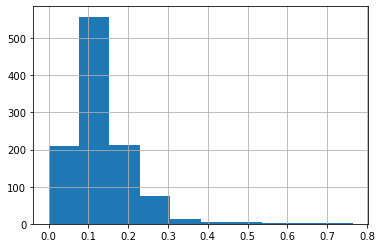

In [19]:
df_order_rider_cancel["rider_cancel_prop"].hist(bins = 10)

On average roughly 13% of orders are cancelled by the customer for each driver.

In [20]:
df_order_admin_cancel.describe()

,admin_cancel_prop
count,1084.000000
mean,0.008680
std,0.026167
min,0.000000
25%,0.000000
50%,0.004998
75%,0.010050
max,0.666667


<AxesSubplot:>

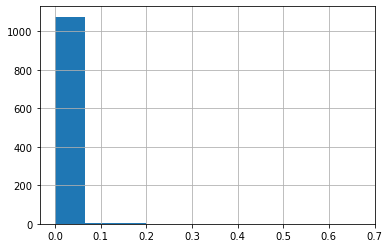

In [21]:
df_order_admin_cancel["admin_cancel_prop"].hist(bins = 10)

Very few orders are cancelled by Kabu on average less than 1%

NOTE: We only had 1084 drivers because 6 drivers have 0 completed orders so we excluded them

## Vehicles

Based on number of trips

<AxesSubplot:title={'center':'Frequency of Car Types by Trip'}>

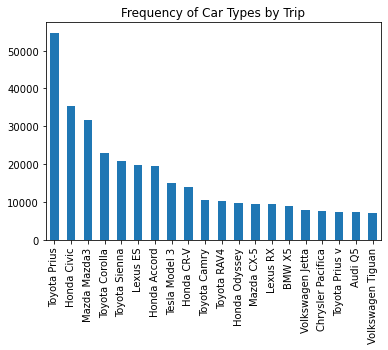

In [22]:
df_vehicles_by_trips = df["car_desc"].value_counts()
df_vehicles_by_trips.head(20).plot(kind = "bar", title  = "Frequency of Car Types by Trip")

Based on driver

<AxesSubplot:title={'center':'Frequency of Car Types by Driver'}, xlabel='car_desc'>

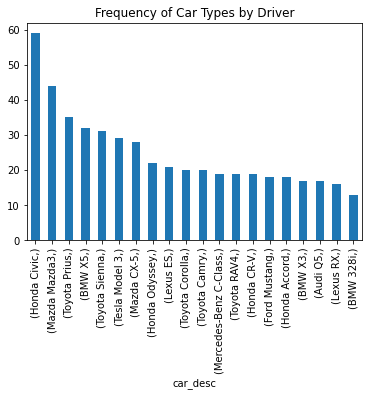

In [23]:
df_vehicles_by_drivers = df[["driver_id","car_desc"]].groupby(["driver_id"])
df_vehicles_by_drivers = df_vehicles_by_drivers.first()
df_vehicles_by_drivers = df_vehicles_by_drivers.value_counts()
df_vehicles_by_drivers.head(20).plot(kind = "bar", title  = "Frequency of Car Types by Driver")

## Cities Frequency

Frequency of start locations by trip

<AxesSubplot:title={'center':'Trip Volume by Start Location'}>

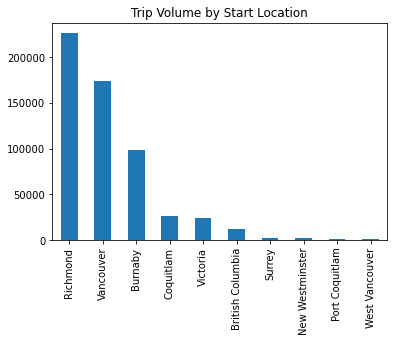

In [24]:
df["cities_from"] = df.address_from.str.split(',').str[-3]
df["cities_from"] = df["cities_from"].str.strip()
cities_from = df["cities_from"].value_counts()
cities_from.head(10).plot(kind = "bar", title  = "Trip Volume by Start Location")

Frequency of destination locations by trip

<AxesSubplot:title={'center':'Trip Volume by Destination'}>

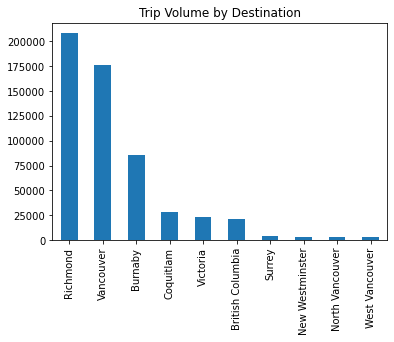

In [25]:
df["cities_to"] = df.address_to.str.split(',').str[-3]
df["cities_to"] = df["cities_to"].str.strip()
cities_to = df["cities_to"].value_counts()
cities_to.head(10).plot(kind = "bar", title  = "Trip Volume by Destination")

Frequency of start -> destination by trip

<AxesSubplot:title={'center':'Trip Volume by Start -> Destination'}>

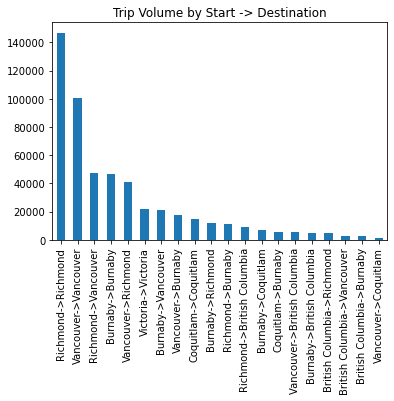

In [26]:
df["cities_from_to"] = df["cities_from"] + "->" + df["cities_to"]
cities_from_to = df["cities_from_to"].value_counts()
cities_from_to.head(20).plot(kind = "bar", title  = "Trip Volume by Start -> Destination")

## Number of Riders

Riders by trip

In [27]:
df["riders_count"].describe()

count    579729.000000
mean          1.534758
std           0.995884
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: riders_count, dtype: float64

<AxesSubplot:>

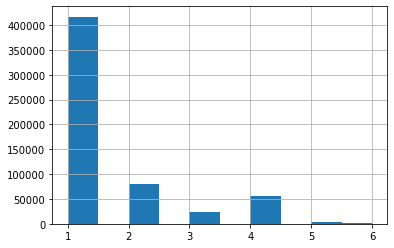

In [28]:
df["riders_count"].hist()

## Distance and Duration

Distance by trip

In [29]:
df["distance"].describe()

count    579729.000000
mean          8.071992
std           6.706913
min           0.040000
25%           2.980000
50%           6.020000
75%          11.780000
max         116.560000
Name: distance, dtype: float64

<AxesSubplot:>

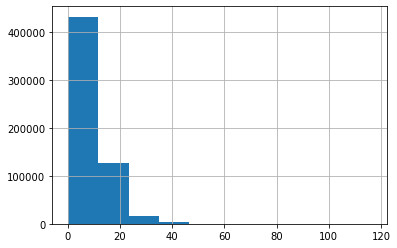

In [30]:
df["distance"].hist(bins = 10)

Most trips are less than 6km

Duration by trip

In [31]:
df["duration"].describe()

count    579729.000000
mean         15.012494
std           9.934836
min           1.000000
25%           7.000000
50%          12.000000
75%          21.000000
max         117.000000
Name: duration, dtype: float64

<AxesSubplot:>

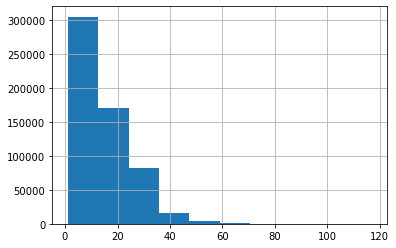

In [32]:
df["duration"].hist(bins = 10)

Most trips last for fewer than 15 minutes, make sense given most trips are less than 6km

## Speed

Speed during trip per trip in km/h

In [33]:
df["speed"] = df["distance"]/df["duration"]*60
df["speed"].describe()

count    579729.000000
mean         29.536525
std           7.894775
min           2.400000
25%          24.461538
50%          29.464286
75%          34.142857
max          89.427273
Name: speed, dtype: float64

<AxesSubplot:>

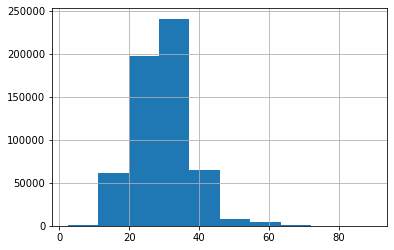

In [34]:
df["speed"].hist(bins = 10)

## Price

Price per trip

In [35]:
df["price"].describe()

count    579724.000000
mean         18.884562
std          11.285161
min           1.000000
25%          10.000000
50%          15.000000
75%          25.000000
max         475.000000
Name: price, dtype: float64

<AxesSubplot:>

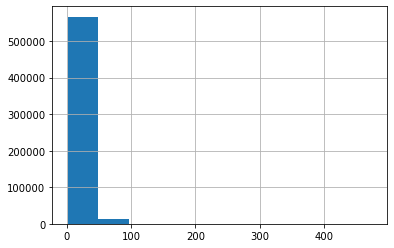

In [36]:
df["price"].hist(bins = 10)

There seems to be signficant outliers, let's take a look at those

In [37]:
df[["cities_from_to","duration","distance","price"]].loc[df["price"] > 150].sort_values(by="distance", ascending=True)

,cities_from_to,duration,distance,price
376135,Nanaimo->Victoria,6,1.22,350.0
496466,Burnaby->West Vancouver,48,22.81,277.0
496344,Richmond->Vancouver,65,40.32,475.0
107611,Vancouver->White Rock,80,47.95,447.0
229552,White Rock->Vancouver,80,48.01,447.0
174298,Burnaby->Abbotsford,49,67.94,200.0
71033,Richmond->Abbotsford,68,82.99,156.0
228298,Richmond->Abbotsford,106,90.13,156.0
256071,Richmond->Abbotsford,106,90.16,151.0
386618,Chilliwack->Burnaby,66,98.37,154.0


We see that the vast majority of trips are less than CAD 25, namely 75% of trip, let's look at the distribution of trips with prices less than CAD 50

<AxesSubplot:>

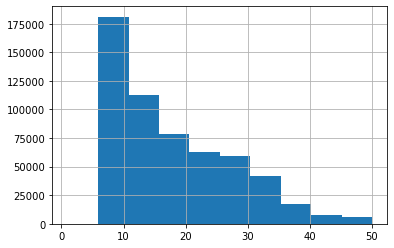

In [38]:
df["price"].loc[df["price"] <= 50].hist(bins = 10)

## Day of Week and Time of Day

Trips in different days and times based on trip start time

<AxesSubplot:title={'center':'Highest volume days'}>

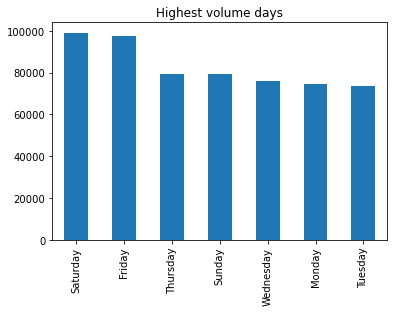

In [39]:
df["start_date.time"]  = pd.to_datetime(df["start_date.time"])
df["day_start"] = df["start_date.time"].dt.day_name() 
days_freq = df["day_start"].value_counts()
days_freq.plot(kind = "bar", title  = "Highest volume days")

Most trips are on Friday and Saturday.

<AxesSubplot:title={'center':'Highest volume hours'}>

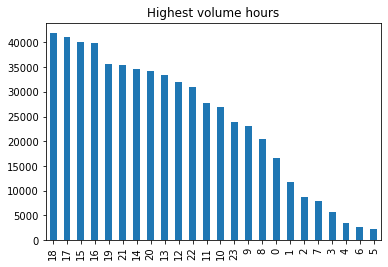

In [40]:
df["hour_start"] = df["start_date.time"].dt.hour.apply(str)
hours_freq = df["hour_start"].value_counts()
hours_freq.plot(kind = "bar", title  = "Highest volume hours")

Most trips are in the later afternoon right around end of day for workers, 5 and 6 PM

<AxesSubplot:title={'center':'Highest volume times'}>

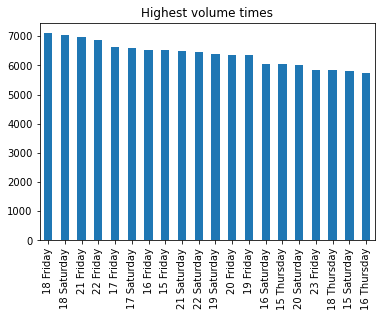

In [41]:
df["hour_day_start"] = df["hour_start"] + " " + df["day_start"]
hour_day_freq = df["hour_day_start"].value_counts()
hour_day_freq.head(20).plot(kind = "bar", title  = "Highest volume times")

<AxesSubplot:title={'center':'Lowest volume times'}>

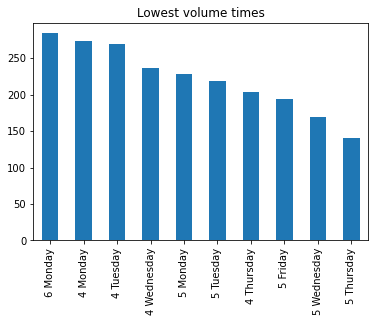

In [42]:
hour_day_freq.tail(10).plot(kind = "bar", title  = "Lowest volume times")

Again we see that Friday and Saturday have the highest volume of trips, with dinner time on Friday and Saturday being the most popular followed by end of night on Friday

Let's see the average drivers per time period

In [43]:
df['round_start_date_time'] = df['start_date.time'].apply(lambda x: x.replace(minute=0, second=0))
df_times_avg_drivers = df[["driver_id","round_start_date_time"]].groupby(["round_start_date_time"]).nunique().sort_values(by="driver_id", ascending=False)

df_times_avg_drivers["day_start"] = df_times_avg_drivers.index.day_name().astype(str) 
df_times_avg_drivers["hour_start"] = df_times_avg_drivers.index.hour.astype(str)
df_times_avg_drivers["hour_day_start"] = df_times_avg_drivers.agg('{0[hour_start]} {0[day_start]}'.format, axis=1)

df_times_avg_drivers.reset_index(inplace = True)

<AxesSubplot:title={'center':'Average Number of Driver during Time Period'}, xlabel='hour_day_start'>

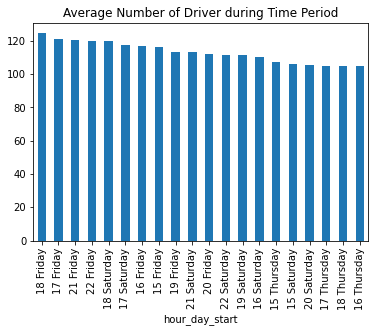

In [44]:
df_driver_work_times = pd.concat([df_times_avg_drivers["driver_id"], df_times_avg_drivers["hour_day_start"]], axis=1)
df_driver_work_times = df_driver_work_times.groupby(["hour_day_start"]).mean().sort_values(by="driver_id", ascending=False)
df_driver_work_times.head(20).plot(kind = "bar", title  = "Average Number of Driver during Time Period", legend = False)

We see the average drivers per period align with the trip volume, during times with more trips we see more drivers. But here Friday night seems to be the most popular with drivers followed by Saturday night.